Using the data given in the UCI Machine Learning repository, predict heart disease based on a few attributes.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [2]:
#Read the data
fname = 'processedCleveland.data'
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']
data = pd.read_csv(fname,names = names)
print(data.info())
print("\n")
print(data.head(n = 5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          303 non-null object
thal        303 non-null object
class       303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
None


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0 

In [3]:
#Remove the nan, non-float and non-int values
DF = data[~data.isin(['?'])]
data = DF.dropna(axis = 0)
print(data.shape)
print("\n")
print(data.info())
print("\n")
print(data.describe())
print("\n")
data = data.apply(pd.to_numeric)
print(data.dtypes)

(297, 14)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null object
thal        297 non-null object
class       297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB
None


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000 

/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/bhargava/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:3

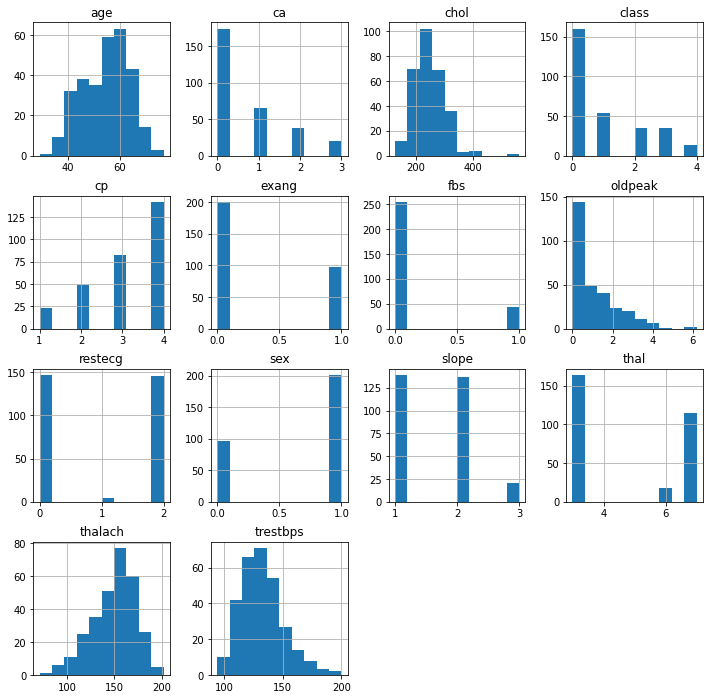

In [4]:
#Plot the various historgrams
data.hist(figsize = (12,12))
plt.show()

In [15]:
#Create training and testing datasets
X = np.array(data.drop(['class'], 1))
Y = np.array(data['class'])
print(set(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print(Y_train.shape)
print(Y_train[:10]) 

{0, 1, 2, 3, 4}
(237, 5)
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


Building and Training the Neural Network
Now that we have our data fully processed and split into training and testing datasets, 
we can begin building a neural network to solve this classification problem. 
Using keras, we will define a simple neural network with one hidden layer. 
We will use a softmax activation function in the final layer of our network.



In [16]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
#define a function to build the keras model
def getModel():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = getModel()
print(model.summary())
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose = 1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.7147 - accuracy: 0.1688
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.5137 - accuracy: 0.2574
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.4629 - accuracy: 0.5063
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.4217 - ac

24/24 [==============================] - 0s 1ms/step - loss: 0.9195 - accuracy: 0.6498
Epoch 76/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9153 - accuracy: 0.6582
Epoch 77/100
24/24 [==============================] - 0s 999us/step - loss: 0.9310 - accuracy: 0.6160
Epoch 78/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9102 - accuracy: 0.6498
Epoch 79/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9370 - accuracy: 0.5865
Epoch 80/100
24/24 [==============================] - 0s 952us/step - loss: 0.9195 - accuracy: 0.6329
Epoch 81/100
24/24 [==============================] - 0s 954us/step - loss: 0.9144 - accuracy: 0.6498
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9113 - accuracy: 0.6329
Epoch 83/100
24/24 [==============================] - 0s 921us/step - loss: 0.9231 - accuracy: 0.6118
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9089 - accuracy: 0.6287
Epoch

Because there's a large error, we can treat this like a binary classification problem
Has Heart disease/Doesn't have heart disease.

In [17]:
Y_train_binary = y_train.copy()
Y_train_binary[Y_train_binary>0] = 1
print(Y_train_binary[:20]) 

[1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1]


In [19]:
#Train the new model
def getBinaryModel():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
binaryModel = getBinaryModel()
print(binaryModel.summary())
binaryModel.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7161 - accuracy: 0.4684
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6969 - accuracy: 0.4388
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5443
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6867 - ac

24/24 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8397
Epoch 76/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8481
Epoch 77/100
24/24 [==============================] - 0s 974us/step - loss: 0.3414 - accuracy: 0.8523
Epoch 78/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8312
Epoch 79/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8439
Epoch 80/100
24/24 [==============================] - 0s 989us/step - loss: 0.3565 - accuracy: 0.8481
Epoch 81/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3625 - accuracy: 0.8312
Epoch 82/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8439
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8523
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.8354
Epoch 85/

In [22]:
#Summarize the results
from sklearn.metrics import classification_report, accuracy_score
categoricalPreds = np.argmax(model.predict(X_test), axis=1)
binaryPreds = np.round(binaryModel.predict(X_test)).astype(int)
Y_test_binary = y_test.copy()
Y_test_binary[Y_test_binary>0] = 1
print("Results for categorical prediction:")
print(accuracy_score(y_test, categoricalPreds))
print(classification_report(y_test, categoricalPreds))
print("\n")
print("Results for binary prediction:")
print(accuracy_score(Y_test_binary,binaryPreds))
print(classification_report(Y_test_binary,binaryPreds))

Results for categorical prediction:
0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        40
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2

    accuracy                           0.67        60
   macro avg       0.13      0.20      0.16        60
weighted avg       0.44      0.67      0.53        60



Results for binary prediction:
0.85
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        40
           1       0.74      0.85      0.79        20

    accuracy                           0.85        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.86      0.85      0.85        60

